In [9]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.spatial.distance import squareform
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist, squareform

# Correlation

$
r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2} \cdot \sqrt{\sum_{i=1}^{n} (y_i - \bar{y})^2}}
$

                Hours of Sleep  Stress Level  Screen Time  Mood Score
Hours of Sleep        1.000000     -0.935761    -0.952084    0.767293
Stress Level         -0.935761      1.000000     0.828289   -0.614465
Screen Time          -0.952084      0.828289     1.000000   -0.779990
Mood Score            0.767293     -0.614465    -0.779990    1.000000


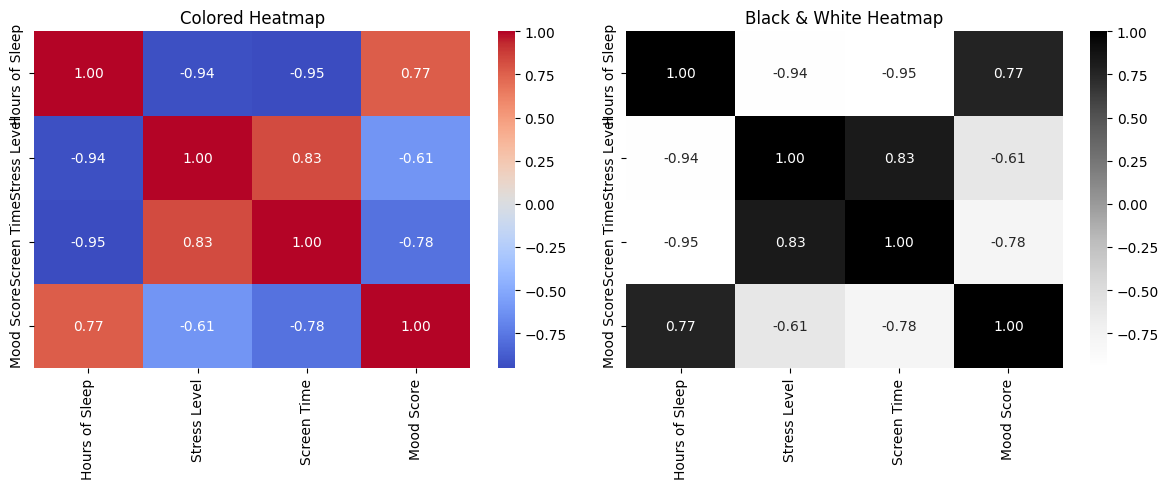

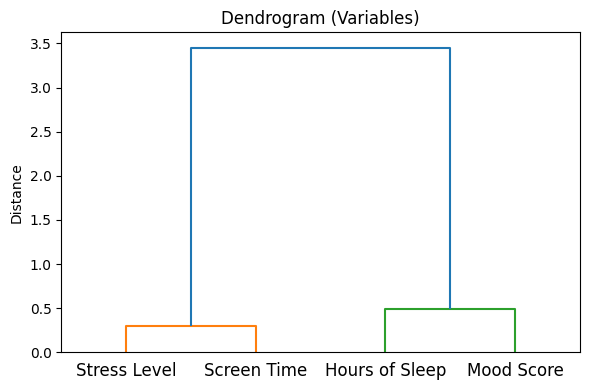

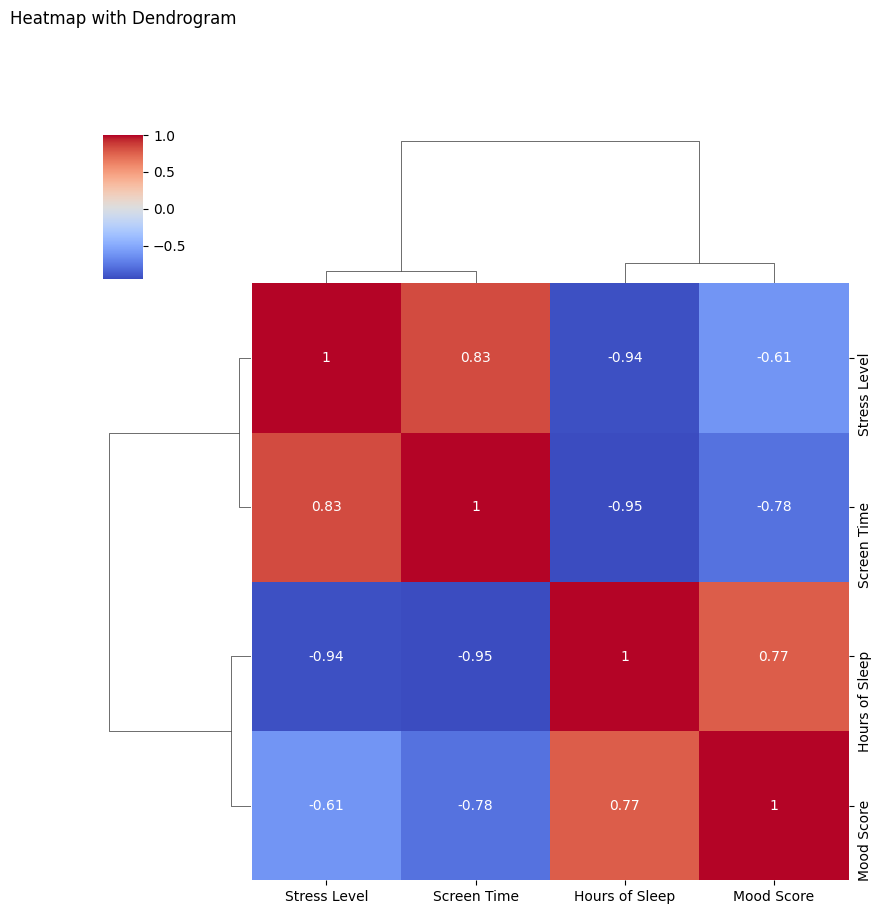

In [11]:
# Step 1: Create the dataset
data = {
    'Hours of Sleep': [7, 6.3, 7.14, 8, 6.2],
    'Stress Level': [2.1, 6.4, 2.8, 0.3, 4.9],
    'Screen Time': [2.4, 3.4, 1.5, 0.5, 4.7],
    'Mood Score': [6.88, 6.68, 6.16, 7.65, 5.37]
}
df = pd.DataFrame(data)

# Step 2: Correlation matrix
corr_matrix = df.corr()

print(corr_matrix)

# Step 3: Plot simple heatmaps (color and B/W)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Colored heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0])
axes[0].set_title("Colored Heatmap")

# Black & White heatmap
sns.heatmap(corr_matrix, annot=True, cmap='Greys', fmt=".2f", ax=axes[1])
axes[1].set_title("Black & White Heatmap")

plt.tight_layout()
plt.show()

# Step 4: Dendrogram (separate from heatmap)
plt.figure(figsize=(6, 4))
linkage = sch.linkage(pdist(corr_matrix), method='average')
sch.dendrogram(linkage, labels=corr_matrix.columns)
plt.title("Dendrogram (Variables)")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

# Step 5: Heatmap with dendrogram (Clustermap)
sns.clustermap(corr_matrix, annot=True, cmap='coolwarm', figsize=(8, 8))
plt.title("Heatmap with Dendrogram", pad=80)
plt.show()

# Display correlation matrix as table


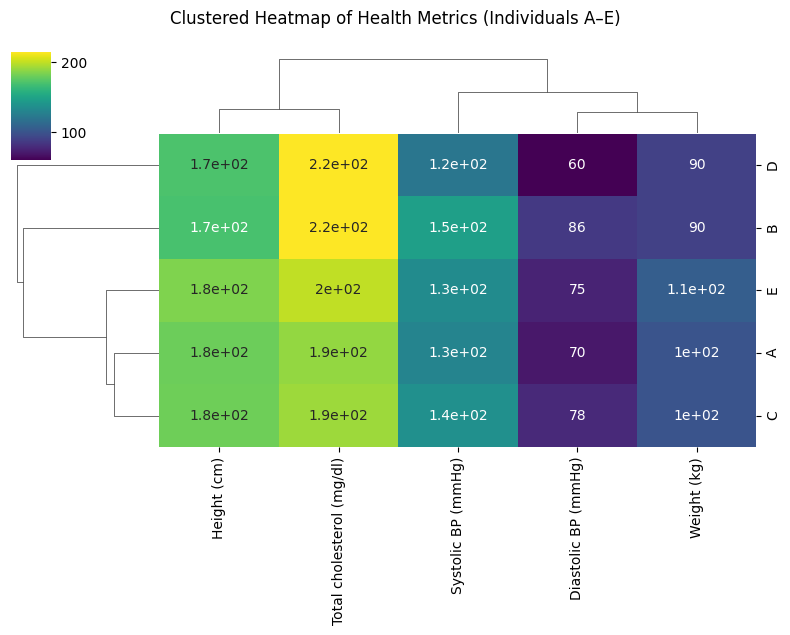

In [22]:
# Step 1: Create the DataFrame
data = {
    'A': [70, 130, 100, 180, 190],
    'B': [86, 147, 90, 170, 215],
    'C': [78, 137, 100, 181, 192],
    'D': [60, 121, 90, 171, 215],
    'E': [75, 134, 106, 185, 200]
}

metrics = [
    'Diastolic BP (mmHg)',
    'Systolic BP (mmHg)',
    'Weight (kg)',
    'Height (cm)',
    'Total cholesterol (mg/dl)'
]

df = pd.DataFrame(data, index=metrics)

# Step 2: Transpose so individuals are rows
df_t = df.T

# Step 3: Generate clustered heatmap
sns.clustermap(df_t, cmap='viridis', annot=True, figsize=(8, 6))
plt.suptitle("Clustered Heatmap of Health Metrics (Individuals A–E)", y=1.05)
plt.show()


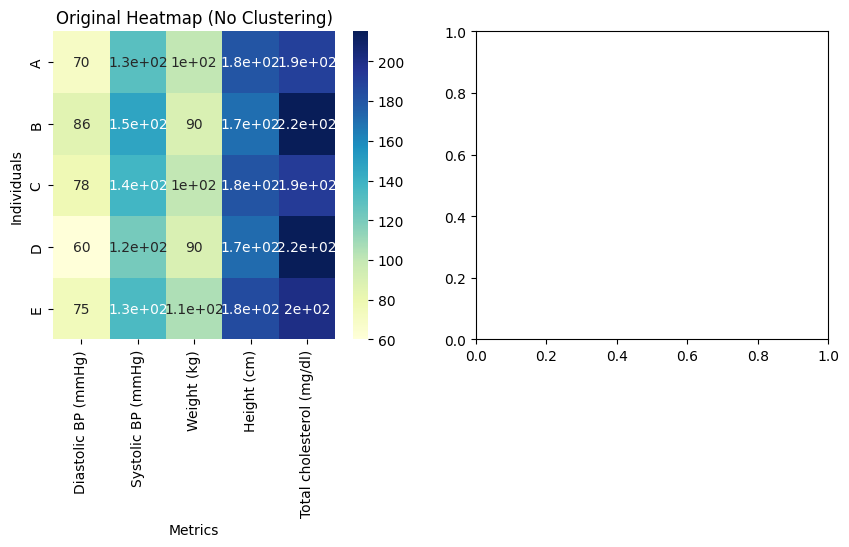

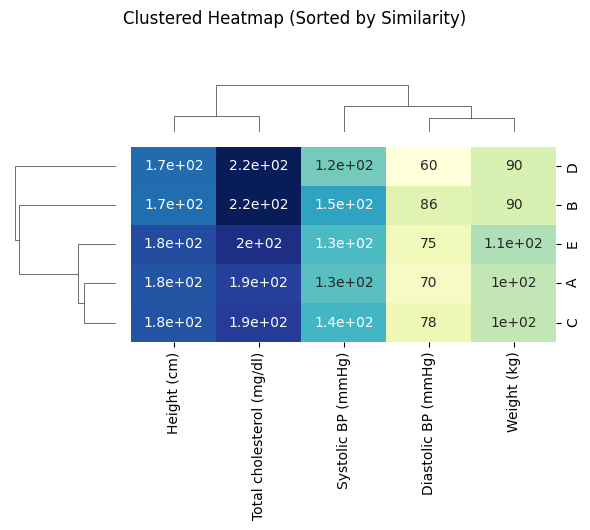

In [23]:
# Step 1: Create the DataFrame
data = {
    'A': [70, 130, 100, 180, 190],
    'B': [86, 147, 90, 170, 215],
    'C': [78, 137, 100, 181, 192],
    'D': [60, 121, 90, 171, 215],
    'E': [75, 134, 106, 185, 200]
}

metrics = [
    'Diastolic BP (mmHg)',
    'Systolic BP (mmHg)',
    'Weight (kg)',
    'Height (cm)',
    'Total cholesterol (mg/dl)'
]

df = pd.DataFrame(data, index=metrics)
df_t = df.T  # Transpose: rows = individuals, columns = metrics

# --- Plot 1: Heatmap BEFORE clustering ---
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(df_t, annot=True, cmap="YlGnBu")
plt.title("Original Heatmap (No Clustering)")
plt.xlabel("Metrics")
plt.ylabel("Individuals")

# --- Plot 2: Heatmap AFTER clustering ---
plt.subplot(1, 2, 2)
sns.clustermap(df_t, cmap="YlGnBu", annot=True, figsize=(6, 5), cbar_pos=None)
plt.suptitle("Clustered Heatmap (Sorted by Similarity)", y=1.05)

plt.tight_layout()
plt.show()


🔢 Pairwise Distance Matrix:

    A  B  C   D
A   0  2  6  10
B   2  0  5   9
C   6  5  0   4
D  10  9  4   0


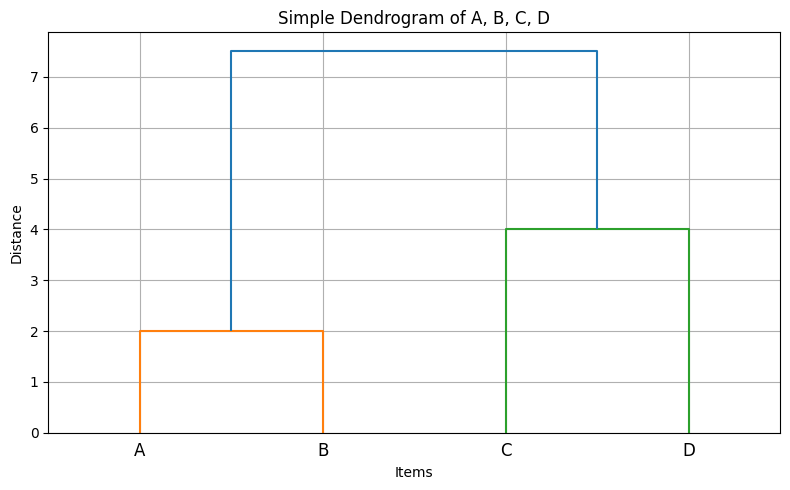

In [31]:
# Define labels
labels = ['A', 'B', 'C', 'D']

# Define pairwise distance matrix (symmetric)
distance_matrix = np.array([
    [0, 2, 6,10],
    [2, 0, 5, 9],
    [6, 5, 0, 4],
    [10,9, 4, 0]
])

# Create a DataFrame to display distances clearly
df_dist = pd.DataFrame(distance_matrix, index=labels, columns=labels)
print("🔢 Pairwise Distance Matrix:\n")
print(df_dist)

# Convert to condensed format for clustering
condensed_dist = squareform(distance_matrix)

# Hierarchical clustering using average linkage
linked = sch.linkage(condensed_dist, method='average')

# Plot dendrogram
plt.figure(figsize=(8, 5))
sch.dendrogram(linked, labels=labels)
plt.title("Simple Dendrogram of A, B, C, D")
plt.xlabel("Items")
plt.ylabel("Distance")
plt.grid(True)
plt.tight_layout()
plt.show()

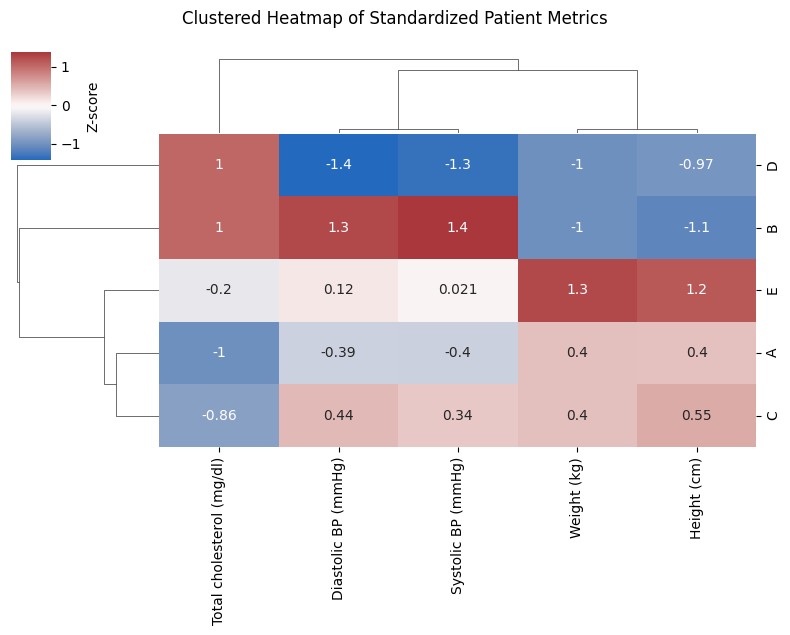

In [32]:
# Step 1: Original patient data
data = {
    'A': [70, 130, 100, 180, 190],
    'B': [86, 147, 90, 170, 215],
    'C': [78, 137, 100, 181, 192],
    'D': [60, 121, 90, 171, 215],
    'E': [75, 134, 106, 185, 200]
}

metrics = [
    'Diastolic BP (mmHg)',
    'Systolic BP (mmHg)',
    'Weight (kg)',
    'Height (cm)',
    'Total cholesterol (mg/dl)'
]


df = pd.DataFrame(data, index=metrics)

# Step 2: Transpose (patients as rows, metrics as columns)
df_t = df.T

# Step 3: Standardize each metric
df_standardized = (df_t - df_t.mean()) / df_t.std()

# Step 4: Plot standardized clustered heatmap
sns.clustermap(df_standardized, cmap='vlag', annot=True, figsize=(8, 6), cbar_kws={'label': 'Z-score'})
plt.suptitle("Clustered Heatmap of Standardized Patient Metrics", y=1.05)
plt.show()

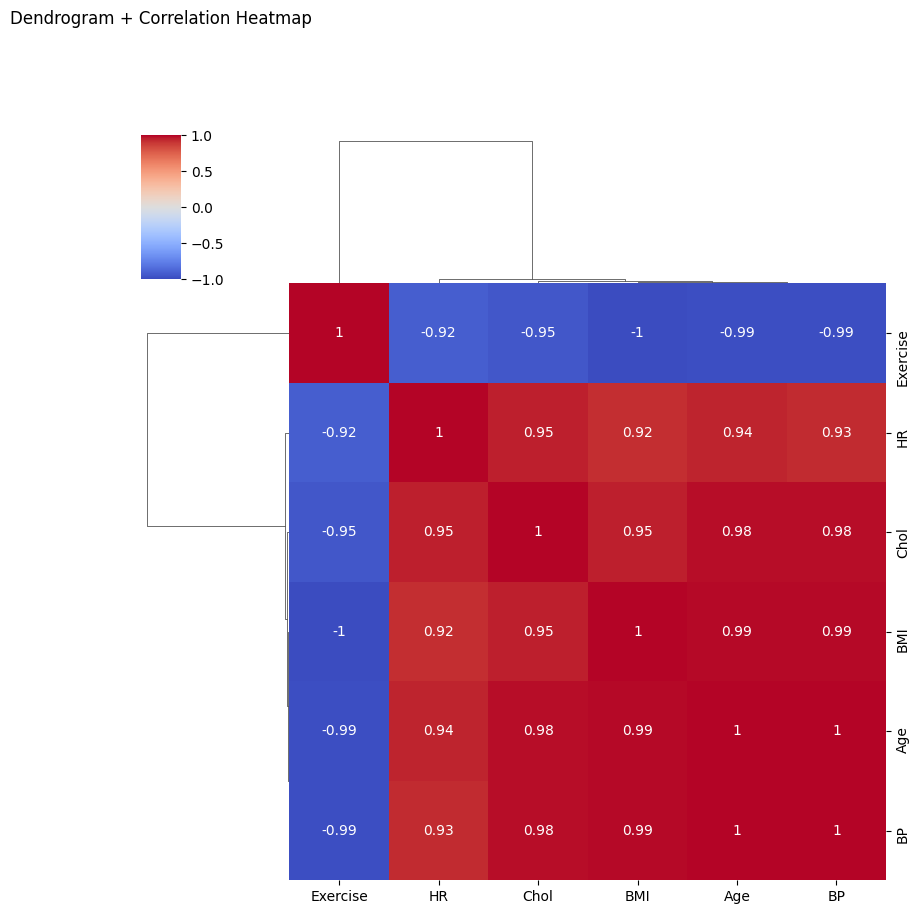

In [33]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Given correlation matrix
corr_data = {
    'Age':      [1.000, 0.986, 0.999, 0.979, -0.986, 0.943],
    'BMI':      [0.986, 1.000, 0.986, 0.953, -1.000, 0.915],
    'BP':       [0.999, 0.986, 1.000, 0.978, -0.986, 0.929],
    'Chol':     [0.979, 0.953, 0.978, 1.000, -0.953, 0.949],
    'Exercise': [-0.986, -1.000, -0.986, -0.953, 1.000, -0.915],
    'HR':       [0.943, 0.915, 0.929, 0.949, -0.915, 1.000]
}

# Create DataFrame
df_corr = pd.DataFrame(corr_data, index=['Age', 'BMI', 'BP', 'Chol', 'Exercise', 'HR'])

# Generate heatmap with dendrogram using clustermap
sns.clustermap(df_corr, annot=True, cmap='coolwarm', figsize=(8, 8))
plt.title("Dendrogram + Correlation Heatmap", pad=80)
plt.show()
